In [57]:
# Another PCA analysis on the breast cancer dataset (with a lot more features than the iris datset)

In [58]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [59]:
bc = load_breast_cancer()
bc.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [60]:
df = pd.DataFrame(bc.data, columns=bc.feature_names)

In [61]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
data_scaled = pd.DataFrame(scaled_data,columns = df.columns)

In [63]:
pca = PCA(n_components = 2)

In [64]:
x_pca = pca.fit_transform(data_scaled)
var = pca.explained_variance_ratio_
print var

[0.44272026 0.18971182]


In [65]:
print pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC1','PC2'])

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
PC1          0.239285        0.258400             0.260854       0.138167   
PC2          0.151892        0.060165            -0.034768       0.190349   

     mean fractal dimension           ...             worst radius  \
PC1                0.064363           ...                 0.227997   
PC2                0.366575           ...                -0.219866   

     worst texture  worst perimeter  worst area  worst smoothness  \
PC1       0.104469         0.236640    0.224871          0.127953   
PC2      -0.045467        -0.199878   -0.219352          0.172304   

     worst compactness  worst concavity  worst concave points  worst symmetry  \
PC1           0.210096         0.

In [66]:
# In this case, only the feature "mean fractal dimension" is not strongly correlated with PC1.
# On the other hand, features "mean texture", "mean concavity", mean concave points", "worst texture", "worst concavity" and "worst concave points" are 
# poorly correlated with PC2.

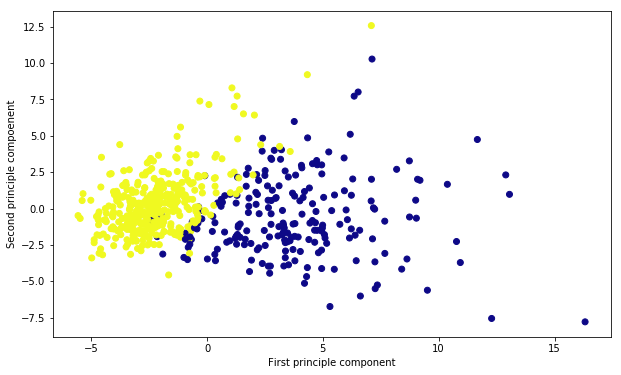

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c = bc.target[:], cmap = 'plasma')
plt.xlabel('First principle component')
plt.ylabel('Second principle compoenent')
plt.show()